In [1]:
import networkx as nx 
import numpy as np
import scipy.linalg as la
from collections import Counter
import matplotlib.pyplot as plt 
from matplotlib.ticker import MultipleLocator
import time 
from SGD import SGD
import fun as f

In [2]:
N = range(1, 300)
c = 2
critical_prob_func = [c * np.log(n)/n for n in N]

In [3]:
probabilities = np.arange(0, 1.01, 0.02).tolist()
replicates = 100
threshold = .95
models = {}
as_connected = {}
for n in N:
    for p in probabilities:
        tempj = {}
        for r in range(replicates):
            g = f.ERB(n, p)
            tempj[r] = nx.is_connected(g)
        ctr = Counter(tempj.values())
        if ctr[True]/replicates >= threshold:
            break
    as_connected[n] = p

In [4]:
n = 150
probabilities = np.linspace(0,1,100)
replicates = 100
tempi = {}
for p in probabilities:
    tempj = {}
    for r in range(replicates):
        g = f.ERB(n, p)
        tempj[r] = nx.is_connected(g)
    ctr = Counter(tempj.values())
    tempi[p] = [ctr, ctr[True]/replicates]

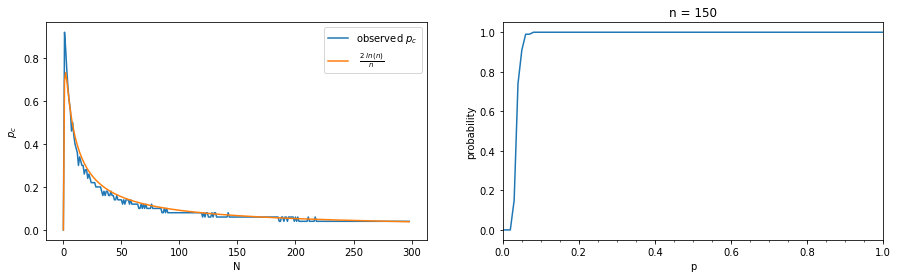

In [5]:
#Probability of having a single component for a ER model with 
# fixed n and different values of p.
fig, axs = plt.subplots(1,2,figsize=(15,4))

axs[0].plot(list(as_connected.values()), label = r'observed $p_c$')
axs[0].plot(critical_prob_func, label = r' $\frac{2 \ ln(n)}{n}$')
axs[0].set_xlabel('N')
axs[0].set_ylabel(r'$p_c$')
axs[0].legend()

axs[1].plot(probabilities, [list(tempi.values())[i][1]
                        for i in range(len(tempi.values()))])
axs[1].xaxis.set_major_locator(MultipleLocator(0.20))
axs[1].xaxis.set_minor_locator(MultipleLocator(0.05))
axs[1].set_xlim(0,1)
axs[1].set_xlabel('p')
axs[1].set_ylabel('probability')
axs[1].set_title(f'n = {n}')

plt.show()

In [6]:
ER_Graphs = nx.read_gpickle("141120ER-Graphs.json")
p = list(ER_Graphs['G_p0'].keys())

In [7]:
ref = p[0]
exp_unnormL = SGD(ref, solve = "standard",
                  G_ref = ER_Graphs['G_p0'][ref],
                  G = ER_Graphs['G_p'])

In [8]:
exp_unnormL.eigenspectrum_G_ref()


Eigen-decomposition of reference model with ref param : 0.1 completed.


In [9]:
exp_unnormL.eigenspectrum_G()

Eigen-decomposition of the 2450 models completed.
took 1.257 minutes.


In [10]:
exp_unnormL.fit_SGD()

The spectral distance between G(0.1) and G(~) is an average  of the SGD between G(0.1) and the 50 replicate models for the 49 generations.

d(G(0.1), G(0.02)): 0.06864098038757246, took: 0.1535 minutes
d(G(0.1), G(0.04)): 0.06156488427456829, took: 0.1399 minutes
d(G(0.1), G(0.06)): 0.058652395533067087, took: 0.1402 minutes
d(G(0.1), G(0.08)): 0.05943278345563905, took: 0.1445 minutes
d(G(0.1), G(0.1)): 0.05873103901825783, took: 0.1461 minutes
d(G(0.1), G(0.12)): 0.05841421276879621, took: 0.1529 minutes
d(G(0.1), G(0.14)): 0.05713870103394553, took: 0.1406 minutes
d(G(0.1), G(0.16)): 0.057757591383097384, took: 0.1412 minutes
d(G(0.1), G(0.18)): 0.05787370669428659, took: 0.1379 minutes
d(G(0.1), G(0.2)): 0.05728822030889517, took: 0.1524 minutes
d(G(0.1), G(0.22)): 0.05700499124937954, took: 0.1437 minutes
d(G(0.1), G(0.24)): 0.05756467463005052, took: 0.141 minutes
d(G(0.1), G(0.26)): 0.057341663602693646, took: 0.1409 minutes
d(G(0.1), G(0.28)): 0.057121236103776694, took: 0.1511

In [11]:
exp_sgd_dic = {}

In [12]:
exp_sgd_dic[ref] = exp_unnormL.rep_sgd

In [22]:
new_ref = p[1]
exp_unnormL.reset_G_ref(new_ref, new_G_ref = ER_Graphs['G_p0'][new_ref])

In [23]:
exp_unnormL.eigenspectrum_G_ref()

Eigen-decomposition of reference model with ref param : 0.2 completed.


In [24]:
exp_unnormL.fit_SGD()

The spectral distance between G(0.2) and G(~) is an average  of the SGD between G(0.2) and the 50 replicate models for the 49 generations.

d(G(0.2), G(0.02)): 0.06681721286972628, took: 0.1976 minutes
d(G(0.2), G(0.04)): 0.06017503238737369, took: 0.2009 minutes
d(G(0.2), G(0.06)): 0.058293685759121375, took: 0.1747 minutes
d(G(0.2), G(0.08)): 0.05851652945545569, took: 0.1994 minutes
d(G(0.2), G(0.1)): 0.057750589732369254, took: 0.21 minutes
d(G(0.2), G(0.12)): 0.05763910099621659, took: 0.1851 minutes
d(G(0.2), G(0.14)): 0.05674607669553804, took: 0.174 minutes
d(G(0.2), G(0.16)): 0.05643952448402554, took: 0.2005 minutes
d(G(0.2), G(0.18)): 0.05658970076961509, took: 0.199 minutes
d(G(0.2), G(0.2)): 0.0570506038357964, took: 0.1967 minutes
d(G(0.2), G(0.22)): 0.056792078572310875, took: 0.1748 minutes
d(G(0.2), G(0.24)): 0.05744262331846314, took: 0.2027 minutes
d(G(0.2), G(0.26)): 0.05627319387621501, took: 0.2109 minutes
d(G(0.2), G(0.28)): 0.05669101673280025, took: 0.1819 minu

In [25]:
exp_sgd_dic[new_ref] = exp_unnormL.rep_sgd

In [26]:
new_ref = p[2]
exp_unnormL.reset_G_ref(new_ref, new_G_ref = ER_Graphs['G_p0'][new_ref])

In [27]:
exp_unnormL.eigenspectrum_G_ref()

Eigen-decomposition of reference model with ref param : 0.3 completed.


In [28]:
exp_unnormL.fit_SGD()

The spectral distance between G(0.3) and G(~) is an average  of the SGD between G(0.3) and the 50 replicate models for the 49 generations.

d(G(0.3), G(0.02)): 0.06711595310919223, took: 0.2618 minutes
d(G(0.3), G(0.04)): 0.06253928934853939, took: 0.2366 minutes
d(G(0.3), G(0.06)): 0.05992833746850175, took: 0.2154 minutes
d(G(0.3), G(0.08)): 0.0588365606287633, took: 0.2264 minutes
d(G(0.3), G(0.1)): 0.05840996560203696, took: 0.2408 minutes
d(G(0.3), G(0.12)): 0.05835250687519737, took: 0.2236 minutes
d(G(0.3), G(0.14)): 0.05729209907525056, took: 0.2367 minutes
d(G(0.3), G(0.16)): 0.056940164310170134, took: 0.2026 minutes
d(G(0.3), G(0.18)): 0.05762895319826291, took: 0.2012 minutes
d(G(0.3), G(0.2)): 0.05769751603752578, took: 0.2014 minutes
d(G(0.3), G(0.22)): 0.05644630403598061, took: 0.1887 minutes
d(G(0.3), G(0.24)): 0.056696571048744954, took: 0.1866 minutes
d(G(0.3), G(0.26)): 0.057647406130969026, took: 0.1925 minutes
d(G(0.3), G(0.28)): 0.0572357946347321, took: 0.1868 m

In [29]:
exp_sgd_dic[new_ref] = exp_unnormL.rep_sgd

In [30]:
new_ref = p[3]
exp_unnormL.reset_G_ref(new_ref, new_G_ref = ER_Graphs['G_p0'][new_ref])

In [31]:
exp_unnormL.eigenspectrum_G_ref()

Eigen-decomposition of reference model with ref param : 0.4 completed.


In [32]:
exp_unnormL.fit_SGD()

The spectral distance between G(0.4) and G(~) is an average  of the SGD between G(0.4) and the 50 replicate models for the 49 generations.

d(G(0.4), G(0.02)): 0.06847047495646728, took: 0.1965 minutes
d(G(0.4), G(0.04)): 0.06133900234052131, took: 0.1966 minutes
d(G(0.4), G(0.06)): 0.05822544775256109, took: 0.1847 minutes
d(G(0.4), G(0.08)): 0.05891109735689378, took: 0.1807 minutes
d(G(0.4), G(0.1)): 0.05773295818974065, took: 0.2216 minutes
d(G(0.4), G(0.12)): 0.057000020870156404, took: 0.2123 minutes
d(G(0.4), G(0.14)): 0.056668711430813284, took: 0.1958 minutes
d(G(0.4), G(0.16)): 0.05704143169881579, took: 0.2005 minutes
d(G(0.4), G(0.18)): 0.05636381148441856, took: 0.1819 minutes
d(G(0.4), G(0.2)): 0.05714457305813689, took: 0.1788 minutes
d(G(0.4), G(0.22)): 0.056384510233118516, took: 0.1884 minutes
d(G(0.4), G(0.24)): 0.05635740362121007, took: 0.1869 minutes
d(G(0.4), G(0.26)): 0.056707562836649024, took: 0.1741 minutes
d(G(0.4), G(0.28)): 0.0564137170132107, took: 0.1865

In [33]:
exp_sgd_dic[new_ref] = exp_unnormL.rep_sgd

In [34]:
new_ref = p[4]
exp_unnormL.reset_G_ref(new_ref, new_G_ref = ER_Graphs['G_p0'][new_ref])

In [35]:
exp_unnormL.eigenspectrum_G_ref()

Eigen-decomposition of reference model with ref param : 0.5 completed.


In [36]:
exp_unnormL.fit_SGD()

The spectral distance between G(0.5) and G(~) is an average  of the SGD between G(0.5) and the 50 replicate models for the 49 generations.

d(G(0.5), G(0.02)): 0.0664037530041801, took: 0.1919 minutes
d(G(0.5), G(0.04)): 0.060112972575460964, took: 0.2143 minutes
d(G(0.5), G(0.06)): 0.0574831799014809, took: 0.2272 minutes
d(G(0.5), G(0.08)): 0.05615188957500125, took: 0.194 minutes
d(G(0.5), G(0.1)): 0.05486997796339318, took: 0.2677 minutes
d(G(0.5), G(0.12)): 0.055283766503185304, took: 0.3304 minutes
d(G(0.5), G(0.14)): 0.05329786953517052, took: 0.3726 minutes
d(G(0.5), G(0.16)): 0.05422750304543333, took: 0.2791 minutes
d(G(0.5), G(0.18)): 0.053800901600610185, took: 0.266 minutes
d(G(0.5), G(0.2)): 0.05392076757073978, took: 0.2231 minutes
d(G(0.5), G(0.22)): 0.05342608169427839, took: 0.2055 minutes
d(G(0.5), G(0.24)): 0.05326485857949548, took: 0.2014 minutes
d(G(0.5), G(0.26)): 0.053336011092831884, took: 0.1936 minutes
d(G(0.5), G(0.28)): 0.053859285805096774, took: 0.2065 m

In [37]:
exp_sgd_dic[new_ref] = exp_unnormL.rep_sgd

In [38]:
new_ref = p[5]
exp_unnormL.reset_G_ref(new_ref, new_G_ref = ER_Graphs['G_p0'][new_ref])

In [39]:
exp_unnormL.eigenspectrum_G_ref()

Eigen-decomposition of reference model with ref param : 0.6 completed.


In [41]:
exp_unnormL.fit_SGD()

The spectral distance between G(0.6) and G(~) is an average  of the SGD between G(0.6) and the 50 replicate models for the 49 generations.

d(G(0.6), G(0.02)): 0.06707638772461481, took: 0.2366 minutes
d(G(0.6), G(0.04)): 0.06010314696191795, took: 0.2153 minutes
d(G(0.6), G(0.06)): 0.057218872247527745, took: 0.3107 minutes
d(G(0.6), G(0.08)): 0.057151613222495144, took: 0.2569 minutes
d(G(0.6), G(0.1)): 0.05705390481971748, took: 0.2537 minutes
d(G(0.6), G(0.12)): 0.056872548320841716, took: 0.209 minutes
d(G(0.6), G(0.14)): 0.05643167047245762, took: 0.2435 minutes
d(G(0.6), G(0.16)): 0.05583540771391307, took: 0.2207 minutes
d(G(0.6), G(0.18)): 0.05594860712255795, took: 0.24 minutes
d(G(0.6), G(0.2)): 0.05640599608865288, took: 0.2459 minutes
d(G(0.6), G(0.22)): 0.05546643719993945, took: 0.2312 minutes
d(G(0.6), G(0.24)): 0.055935481783277806, took: 0.2123 minutes
d(G(0.6), G(0.26)): 0.05595184179610999, took: 0.1911 minutes
d(G(0.6), G(0.28)): 0.05618495669463248, took: 0.2158 m

In [42]:
exp_sgd_dic[new_ref] = exp_unnormL.rep_sgd

In [45]:
new_ref = p[6]
exp_unnormL.reset_G_ref(new_ref, new_G_ref = ER_Graphs['G_p0'][new_ref])

In [46]:
exp_unnormL.eigenspectrum_G_ref()

Eigen-decomposition of reference model with ref param : 0.7 completed.


In [47]:
exp_unnormL.fit_SGD()

The spectral distance between G(0.7) and G(~) is an average  of the SGD between G(0.7) and the 50 replicate models for the 49 generations.

d(G(0.7), G(0.02)): 0.06760162469300982, took: 0.2167 minutes
d(G(0.7), G(0.04)): 0.06253768315848525, took: 0.2181 minutes
d(G(0.7), G(0.06)): 0.060185206682805, took: 0.2536 minutes
d(G(0.7), G(0.08)): 0.05921446629635709, took: 0.2709 minutes
d(G(0.7), G(0.1)): 0.05821947631491499, took: 0.2569 minutes
d(G(0.7), G(0.12)): 0.05827864342973508, took: 0.2535 minutes
d(G(0.7), G(0.14)): 0.057887945162327974, took: 0.2244 minutes
d(G(0.7), G(0.16)): 0.058043956536424135, took: 0.2471 minutes
d(G(0.7), G(0.18)): 0.057700164131761864, took: 0.3004 minutes
d(G(0.7), G(0.2)): 0.05796739899402974, took: 0.4454 minutes
d(G(0.7), G(0.22)): 0.05687238210159297, took: 0.423 minutes
d(G(0.7), G(0.24)): 0.05727694029853916, took: 0.2888 minutes
d(G(0.7), G(0.26)): 0.058177026967126046, took: 0.2393 minutes
d(G(0.7), G(0.28)): 0.057436458095283, took: 0.2249 min

In [48]:
exp_sgd_dic[new_ref] = exp_unnormL.rep_sgd

In [49]:
new_ref = p[7]
exp_unnormL.reset_G_ref(new_ref, new_G_ref = ER_Graphs['G_p0'][new_ref])

In [50]:
exp_unnormL.eigenspectrum_G_ref()

Eigen-decomposition of reference model with ref param : 0.8 completed.


In [51]:
exp_unnormL.fit_SGD()

The spectral distance between G(0.8) and G(~) is an average  of the SGD between G(0.8) and the 50 replicate models for the 49 generations.

d(G(0.8), G(0.02)): 0.0673483274381817, took: 0.2632 minutes
d(G(0.8), G(0.04)): 0.060825196494487754, took: 0.2259 minutes
d(G(0.8), G(0.06)): 0.058804078279977016, took: 0.2013 minutes
d(G(0.8), G(0.08)): 0.05803448571790654, took: 0.2108 minutes
d(G(0.8), G(0.1)): 0.05698068132846679, took: 0.2371 minutes
d(G(0.8), G(0.12)): 0.05611221871862124, took: 0.2287 minutes
d(G(0.8), G(0.14)): 0.056083401112870745, took: 0.2156 minutes
d(G(0.8), G(0.16)): 0.05580595561459207, took: 0.2215 minutes
d(G(0.8), G(0.18)): 0.05556139510580013, took: 0.2526 minutes
d(G(0.8), G(0.2)): 0.055467963460842686, took: 0.218 minutes
d(G(0.8), G(0.22)): 0.05526273261630507, took: 0.268 minutes
d(G(0.8), G(0.24)): 0.05550931747604828, took: 0.2528 minutes
d(G(0.8), G(0.26)): 0.05586086196996362, took: 0.2261 minutes
d(G(0.8), G(0.28)): 0.05598734955748373, took: 0.1932 m

In [52]:
exp_sgd_dic[new_ref] = exp_unnormL.rep_sgd

In [53]:
new_ref = p[8]
exp_unnormL.reset_G_ref(new_ref, new_G_ref = ER_Graphs['G_p0'][new_ref])

In [54]:
exp_unnormL.eigenspectrum_G_ref()

Eigen-decomposition of reference model with ref param : 0.9 completed.


In [55]:
exp_unnormL.fit_SGD()

The spectral distance between G(0.9) and G(~) is an average  of the SGD between G(0.9) and the 50 replicate models for the 49 generations.

d(G(0.9), G(0.02)): 0.07173341666693708, took: 0.2001 minutes
d(G(0.9), G(0.04)): 0.06542587593402438, took: 0.1773 minutes
d(G(0.9), G(0.06)): 0.0631248295798133, took: 0.1759 minutes
d(G(0.9), G(0.08)): 0.06133622486835238, took: 0.2372 minutes
d(G(0.9), G(0.1)): 0.06089109090039128, took: 0.2519 minutes
d(G(0.9), G(0.12)): 0.06049260351657252, took: 0.2452 minutes
d(G(0.9), G(0.14)): 0.05910196515140281, took: 0.2222 minutes
d(G(0.9), G(0.16)): 0.05940273991211351, took: 0.1952 minutes
d(G(0.9), G(0.18)): 0.058605211737983956, took: 0.2585 minutes
d(G(0.9), G(0.2)): 0.059020554524503374, took: 0.2586 minutes
d(G(0.9), G(0.22)): 0.058827386388576874, took: 0.2483 minutes
d(G(0.9), G(0.24)): 0.05855352169350689, took: 0.2225 minutes
d(G(0.9), G(0.26)): 0.05918922654135485, took: 0.1976 minutes
d(G(0.9), G(0.28)): 0.058127258721831165, took: 0.1971

In [56]:
exp_sgd_dic[new_ref] = exp_unnormL.rep_sgd

In [62]:
mean_dic = {}
std_dic = {}
A_dic_ref = {}
for key, value in exp_sgd_dic.items():
    A_dic_ref[key] = (nx.adjacency_matrix(ER_Graphs['G_p0'][key])).todense()
    mean_dic[key] = [np.mean(value[i]) for i in exp_unnormL.keys]
    std_dic[key] = [np.std(value[i]) for i in exp_unnormL.keys]

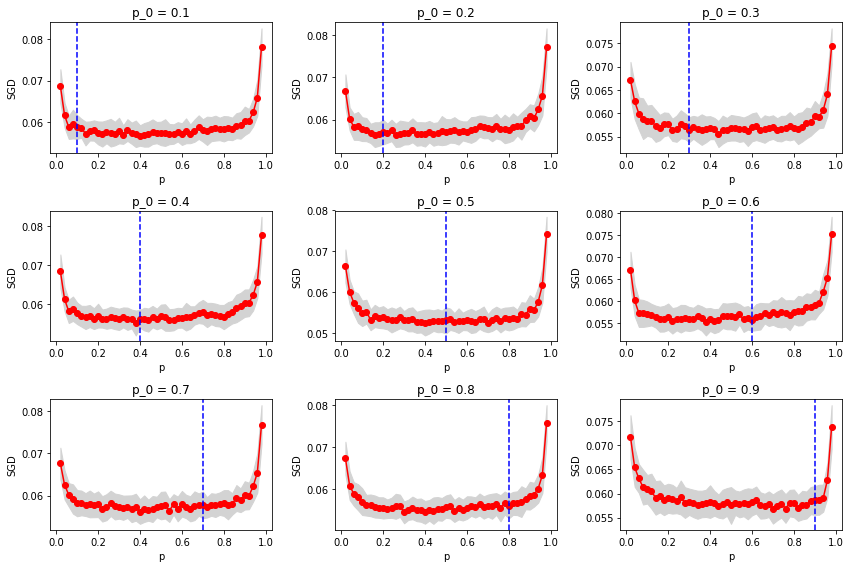

In [64]:
p0_list = list(exp_sgd_dic.keys())
p0=p0_list[0]
fig = plt.figure(figsize=(12, 8))
for i in range(9):
    p0=p0_list[i]
    plt.subplot(3, 3, i+1)
    plt.tight_layout()
    plt.title('p_0 = ' + str(p0))
    plt.xlabel('p')
    plt.ylabel('SGD')
    plt.plot(exp_unnormL.keys, mean_dic[p0], '-o', color = 'red')
    plt.axvline(x = p0, color = 'blue', linestyle = '--', label = "p_0 = "+ str(p0))
    plt.fill_between(exp_unnormL.keys, [mean_dic[p0][i] - std_dic[p0][i] for i in range(len(mean_dic[p0]))],
                     [mean_dic[p0][i] + std_dic[p0][i] for i in range(len(std_dic[p0]))], 
                     color = 'lightgrey')
